In [5]:
import pandas as pd

df = pd.read_csv("all_tickets_processed_improved_v3.csv.zip")  # or .zip if CSV not available
print(df.head())
print("Columns in the dataset:", df.columns.tolist())

                                            Document    Topic_group
0  connection with icon icon dear please setup ic...       Hardware
1  work experience user work experience user hi w...         Access
2  requesting for meeting requesting meeting hi p...       Hardware
3  reset passwords for external accounts re expir...         Access
4  mail verification warning hi has got attached ...  Miscellaneous
Columns in the dataset: ['Document', 'Topic_group']


Dataset Loaded Successfully!
Shape: (47837, 2)
Columns: ['Document', 'Topic_group']

Text Cleaning Completed!

Train-Test Split Done!

TF-IDF Vectorization Completed!
Vector Size: (38269, 15000)

Logistic Regression Model Trained!
Accuracy: 0.8545150501672241

Random Forest Model Trained!
Accuracy: 0.8397784280936454

Classification Report (Logistic Regression):

                       precision    recall  f1-score   support

               Access       0.92      0.88      0.90      1425
Administrative rights       0.89      0.63      0.74       352
           HR Support       0.87      0.87      0.87      2183
             Hardware       0.79      0.89      0.84      2724
     Internal Project       0.91      0.80      0.85       424
        Miscellaneous       0.83      0.82      0.82      1412
             Purchase       0.98      0.87      0.92       493
              Storage       0.95      0.83      0.88       555

             accuracy                           0.85      9568
  

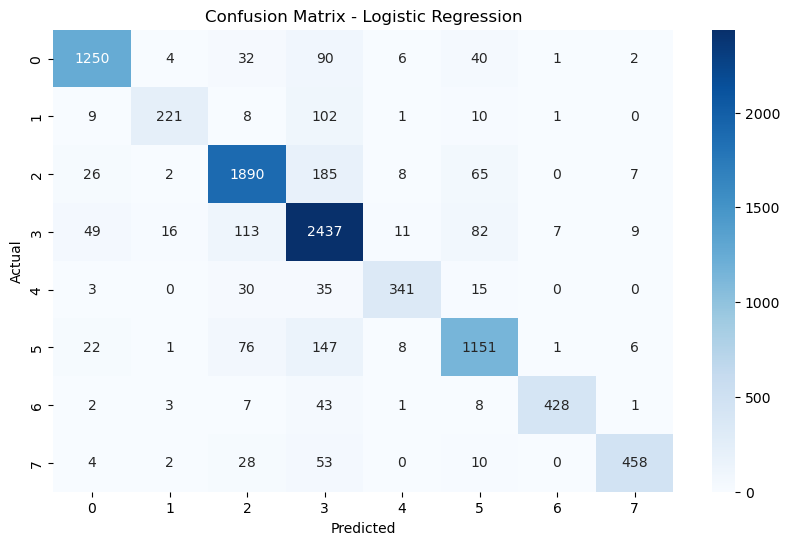


Model & Vectorizer Saved Successfully!

Sample Ticket: Laptop is not powering on and showing hardware error
Predicted Category: Hardware


In [8]:
# ================================
# IT SERVICE TICKET CLASSIFICATION
# Complete End-to-End ML Pipeline
# ================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import joblib
import warnings

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

warnings.filterwarnings("ignore")

# ================================
# 1. Load Dataset
# ================================

file_path = "all_tickets_processed_improved_v3.csv.zip"
df = pd.read_csv(file_path)

print("Dataset Loaded Successfully!")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

# ================================
# 2. Data Cleaning
# ================================

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip()
    return text

df['clean_text'] = df['Document'].apply(clean_text)

print("\nText Cleaning Completed!")

# ================================
# 3. Train-Test Split
# ================================

X = df['clean_text']
y = df['Topic_group']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nTrain-Test Split Done!")

# ================================
# 4. TF-IDF Vectorization
# ================================

vectorizer = TfidfVectorizer(
    stop_words='english',
    max_features=15000,
    ngram_range=(1,2)
)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print("\nTF-IDF Vectorization Completed!")
print("Vector Size:", X_train_vec.shape)

# ================================
# 5. Train Logistic Regression Model
# ================================

lr_model = LogisticRegression(max_iter=300)
lr_model.fit(X_train_vec, y_train)

y_pred_lr = lr_model.predict(X_test_vec)

print("\nLogistic Regression Model Trained!")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

# ================================
# 6. Train Random Forest Model
# ================================

rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train_vec, y_train)
y_pred_rf = rf_model.predict(X_test_vec)

print("\nRandom Forest Model Trained!")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

# ================================
# 7. Model Evaluation
# ================================

print("\nClassification Report (Logistic Regression):\n")
print(classification_report(y_test, y_pred_lr))

# ================================
# 8. Confusion Matrix Plot
# ================================

cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ================================
# 9. Save Best Model
# ================================

joblib.dump(lr_model, "ticket_classifier_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

print("\nModel & Vectorizer Saved Successfully!")

# ================================
# 10. Real-Time Prediction Function
# ================================

def predict_ticket_category(text):
    text = clean_text(text)
    vec = vectorizer.transform([text])
    prediction = lr_model.predict(vec)
    return prediction[0]

# ================================
# 11. Test Prediction
# ================================

sample_ticket = "Laptop is not powering on and showing hardware error"
print("\nSample Ticket:", sample_ticket)
print("Predicted Category:", predict_ticket_category(sample_ticket))

# ================================
# END OF PROJECT PIPELINE
# ================================

Dataset Loaded Successfully
Dataset Shape: (47837, 2)
Columns: ['Document', 'Topic_group']

Text Cleaning Completed
Train Size: 38269
Test Size: 9568
TF-IDF Shape: (38269, 20000)

Model Training Completed

Final Accuracy: 0.8528428093645485

Classification Report:

                       precision    recall  f1-score   support

               Access       0.90      0.89      0.89      1425
Administrative rights       0.70      0.87      0.77       352
           HR Support       0.89      0.84      0.87      2183
             Hardware       0.86      0.80      0.83      2724
     Internal Project       0.79      0.93      0.86       424
        Miscellaneous       0.79      0.86      0.82      1412
             Purchase       0.92      0.90      0.91       493
              Storage       0.86      0.92      0.89       555

             accuracy                           0.85      9568
            macro avg       0.84      0.88      0.86      9568
         weighted avg       0.86      0

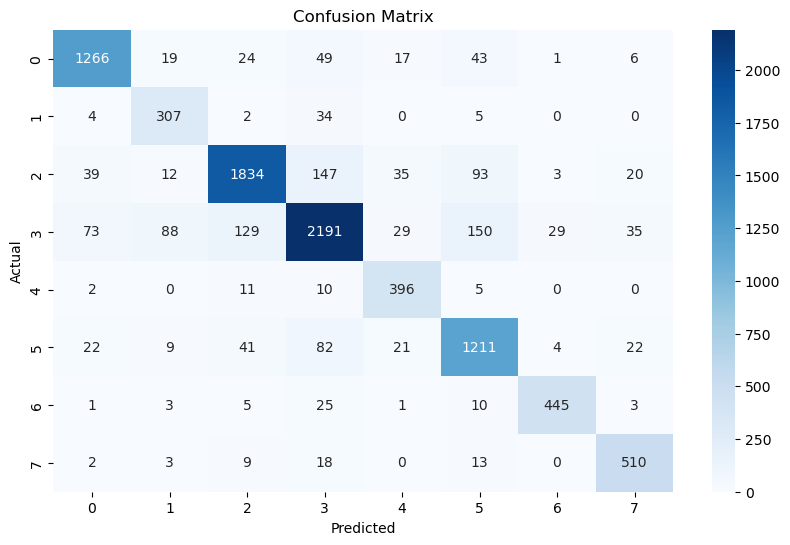


Model and Vectorizer Saved Successfully

Sample Predictions:
My laptop is overheating and shutting down --> Hardware
Unable to reset my login password --> Access
Need access to internal HR portal --> Hardware
Request for new software installation --> Administrative rights


In [11]:
# ============================================
# IT SERVICE TICKET CLASSIFICATION 
# ============================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import joblib
import warnings

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

warnings.filterwarnings("ignore")

# ============================================
# 1. Load Dataset
# ============================================

file_path = "all_tickets_processed_improved_v3.csv.zip"
df = pd.read_csv(file_path)

print("Dataset Loaded Successfully")
print("Dataset Shape:", df.shape)
print("Columns:", df.columns.tolist())

# ============================================
# 2. Data Preprocessing
# ============================================

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\S+@\S+', '', text)       # remove emails
    text = re.sub(r'http\S+|www\S+', '', text) # remove urls
    text = re.sub(r'\d+', '', text)           # remove digits
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\s+', ' ', text)          # remove extra spaces
    return text.strip()

df['clean_text'] = df['Document'].apply(clean_text)

print("\nText Cleaning Completed")

# ============================================
# 3. Train Test Split
# ============================================

X = df['clean_text']
y = df['Topic_group']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train Size:", X_train.shape[0])
print("Test Size:", X_test.shape[0])

# ============================================
# 4. TF-IDF Vectorization (Optimized)
# ============================================

vectorizer = TfidfVectorizer(
    stop_words='english',
    max_features=20000,
    min_df=2,
    max_df=0.95,
    ngram_range=(1,2)
)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print("TF-IDF Shape:", X_train_vec.shape)

# ============================================
# 5. Model Training - Optimized Logistic Regression
# ============================================

lr_model = LogisticRegression(
    max_iter=500,
    class_weight='balanced',
    n_jobs=-1
)

lr_model.fit(X_train_vec, y_train)

y_pred = lr_model.predict(X_test_vec)

print("\nModel Training Completed")

# ============================================
# 6. Evaluation
# ============================================

acc = accuracy_score(y_test, y_pred)
print("\nFinal Accuracy:", acc)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# ============================================
# 7. Confusion Matrix Visualization
# ============================================

plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ============================================
# 8. Save Model & Vectorizer
# ============================================

joblib.dump(lr_model, "ticket_classifier_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

print("\nModel and Vectorizer Saved Successfully")

# ============================================
# 9. Real-Time Prediction Function
# ============================================

def predict_ticket(text):
    text = clean_text(text)
    vec = vectorizer.transform([text])
    return lr_model.predict(vec)[0]

# ============================================
# 10. Sample Predictions
# ============================================

samples = [
    "My laptop is overheating and shutting down",
    "Unable to reset my login password",
    "Need access to internal HR portal",
    "Request for new software installation"
]

print("\nSample Predictions:")
for s in samples:
    print(f"{s} --> {predict_ticket(s)}")

# ============================================
# END OF PROJECT
# ============================================

Dataset Loaded Successfully
Shape: (47837, 2)
Columns: ['Document', 'Topic_group']
Text Cleaning Completed
Train Size: 38269
Test Size: 9568
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best Model Parameters: {'clf__C': 2.0}
Cross Validation Accuracy: 0.8537720442866235

Final Test Accuracy: 0.8565008361204013

Classification Report:

                       precision    recall  f1-score   support

               Access       0.90      0.89      0.90      1425
Administrative rights       0.72      0.85      0.78       352
           HR Support       0.89      0.85      0.87      2183
             Hardware       0.85      0.82      0.83      2724
     Internal Project       0.81      0.92      0.86       424
        Miscellaneous       0.80      0.85      0.83      1412
             Purchase       0.93      0.91      0.92       493
              Storage       0.87      0.92      0.89       555

             accuracy                           0.86      9568
            macro

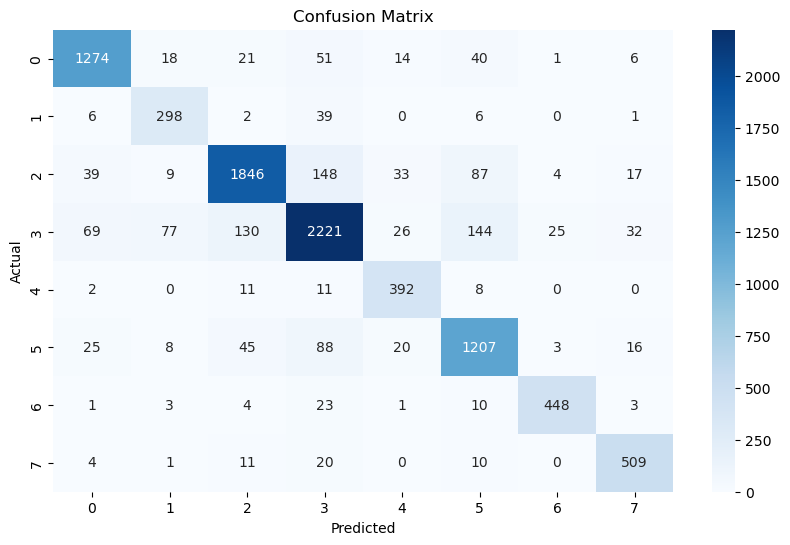

Model and Vectorizer Saved Successfully

Sample Predictions:

My laptop is overheating and suddenly shutting down  --->  Hardware
Unable to reset my corporate email password  --->  Access
Need admin access to install software  --->  Administrative rights
VPN connection is not working  --->  Hardware
Request for new system purchase  --->  Purchase


In [1]:
# ==========================================================
# IT SERVICE TICKET CLASSIFICATION - FINAL PROFESSIONAL CODE
# Machine Learning + NLP 
# ==========================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import joblib
import warnings

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

warnings.filterwarnings("ignore")

# ==========================================================
# 1. Load Dataset
# ==========================================================

file_path = "all_tickets_processed_improved_v3.csv.zip"
df = pd.read_csv(file_path)

print("Dataset Loaded Successfully")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

# ==========================================================
# 2. Advanced Text Preprocessing
# ==========================================================

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\S+@\S+', '', text)
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

df['clean_text'] = df['Document'].apply(clean_text)

print("Text Cleaning Completed")

# ==========================================================
# 3. Train-Test Split (Stratified)
# ==========================================================

X = df['clean_text']
y = df['Topic_group']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train Size:", X_train.shape[0])
print("Test Size:", X_test.shape[0])

# ==========================================================
# 4. NLP Pipeline with TF-IDF + Logistic Regression
# ==========================================================

pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(
        stop_words="english",
        max_features=30000,
        min_df=2,
        max_df=0.95,
        ngram_range=(1,2)
    )),
    ("clf", LogisticRegression(
        max_iter=600,
        class_weight="balanced",
        n_jobs=-1,
        solver="lbfgs"
    ))
])

# ==========================================================
# 5. Hyperparameter Tuning (GridSearch)
# ==========================================================

param_grid = {
    "clf__C": [0.5, 1.0, 2.0]
}

grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)

best_model = grid.best_estimator_

print("Best Model Parameters:", grid.best_params_)

# ==========================================================
# 6. Cross Validation Accuracy
# ==========================================================

cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring="accuracy")

print("Cross Validation Accuracy:", cv_scores.mean())

# ==========================================================
# 7. Model Evaluation
# ==========================================================

y_pred = best_model.predict(X_test)

print("\nFinal Test Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# ==========================================================
# 8. Confusion Matrix Visualization
# ==========================================================

plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ==========================================================
# 9. Save Final Model and Vectorizer (No Renaming)
# ==========================================================

joblib.dump(best_model.named_steps["clf"], "ticket_classifier_model.pkl")
joblib.dump(best_model.named_steps["tfidf"], "tfidf_vectorizer.pkl")

print("Model and Vectorizer Saved Successfully")

# ==========================================================
# 10. Real-Time Ticket Prediction System
# ==========================================================

def predict_ticket_category(text):
    text = clean_text(text)
    return best_model.predict([text])[0]

# ==========================================================
# 11. Real-World Test Predictions
# ==========================================================

test_samples = [
    "My laptop is overheating and suddenly shutting down",
    "Unable to reset my corporate email password",
    "Need admin access to install software",
    "VPN connection is not working",
    "Request for new system purchase"
]

print("\nSample Predictions:\n")
for t in test_samples:
    print(f"{t}  --->  {predict_ticket_category(t)}")

# ==========================================================
# END OF FINAL PROFESSIONAL PROJECT PIPELINE
# ==========================================================

In [4]:
!pip install tensorflow

   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/332.0 MB 3.4 MB/s eta 0:01:39
   ---------------------------------------- 1.8/332.0 MB 5.0 MB/s eta 0:01:07
   ---------------------------------------- 3.1/332.0 MB 5.6 MB/s eta 0:00:59
   ---------------------------------------- 3.9/332.0 MB 5.3 MB/s eta 0:01:03
    --------------------------------------- 5.0/332.0 MB 4.9 MB/s eta 0:01:07
    --------------------------------------- 6.0/332.0 MB 5.1 MB/s eta 0:01:04
    --------------------------------------- 6.8/332.0 MB 4.8 MB/s eta 0:01:08
    --------------------------------------- 8.1/332.0 MB 5.0 MB/s eta 0:01:05
   - -------------------------------------- 9.7/332.0 MB 5.3 MB/s eta 0:01:02
   - -------------------------------------- 10.7/332.0 MB 5.4 MB/s eta 0:01:01
   - -------------------------------------- 12.6/332.0 MB 5.6 MB/s eta 0:00:58
   - -------------------------------------- 13.6/332.0 MB 5.6 MB/s et

In [6]:
# =====================================================
# IT SERVICE TICKET CLASSIFICATION - LSTM (CPU FRIENDLY)
# =====================================================

import numpy as np
import pandas as pd
import re
import string

# Install tensorflow if missing (safe check)
try:
    import tensorflow as tf
except:
    import os
    os.system("pip install tensorflow")
    import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# =============================
# 1. Load Dataset
# =============================

df = pd.read_csv("all_tickets_processed_improved_v3.csv.zip")

print("Dataset Loaded:", df.shape)

# =============================
# 2. Text Cleaning
# =============================

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

df["clean_text"] = df["Document"].apply(clean_text)

# =============================
# 3. Label Encoding
# =============================

le = LabelEncoder()
df["label"] = le.fit_transform(df["Topic_group"])

num_classes = len(df["label"].unique())

# =============================
# 4. Tokenization & Padding
# =============================

max_words = 30000
max_len = 120

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df["clean_text"])

sequences = tokenizer.texts_to_sequences(df["clean_text"])
padded = pad_sequences(sequences, maxlen=max_len, padding="post")

labels = to_categorical(df["label"], num_classes=num_classes)

# =============================
# 5. Train-Test Split
# =============================

X_train, X_test, y_train, y_test = train_test_split(
    padded, labels, test_size=0.2, random_state=42, stratify=labels
)

# =============================
# 6. Build LSTM Model
# =============================

model = Sequential([
    Embedding(max_words, 128, input_length=max_len),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.3),
    Bidirectional(LSTM(32)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

model.summary()

# =============================
# 7. Train Model
# =============================

history = model.fit(
    X_train, y_train,
    epochs=6,
    batch_size=128,
    validation_data=(X_test, y_test)
)

# =============================
# 8. Evaluation
# =============================

loss, acc = model.evaluate(X_test, y_test)
print("Final LSTM Accuracy:", acc)

# =============================
# 9. Prediction Function
# =============================

def predict_ticket_lstm(text):
    text = clean_text(text)
    seq = tokenizer.texts_to_sequences([text])
    pad = pad_sequences(seq, maxlen=max_len, padding="post")
    pred = model.predict(pad)
    return le.inverse_transform([np.argmax(pred)])[0]

# =============================
# 10. Test Prediction
# =============================

sample = "Unable to login into VPN after password reset"
print("Prediction:", predict_ticket_lstm(sample))

Dataset Loaded: (47837, 2)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/6
299/299 ━━━━━━━━━━━━━━━━━━━━ 164s 491ms/step - accuracy: 0.6929 - loss: 0.9251 - val_accuracy: 0.8194 - val_loss: 0.5546
Epoch 2/6
299/299 ━━━━━━━━━━━━━━━━━━━━ 163s 545ms/step - accuracy: 0.8615 - loss: 0.4527 - val_accuracy: 0.8408 - val_loss: 0.4902
Epoch 3/6
299/299 ━━━━━━━━━━━━━━━━━━━━ 154s 516ms/step - accuracy: 0.8924 - loss: 0.3489 - val_accuracy: 0.8483 - val_loss: 0.4645
Epoch 4/6
299/299 ━━━━━━━━━━━━━━━━━━━━ 152s 510ms/step - accuracy: 0.9105 - loss: 0.2888 - val_accuracy: 0.8502 - val_loss: 0.4880
Epoch 5/6
299/299 ━━━━━━━━━━━━━━━━━━━━ 156s 521ms/step - accuracy: 0.9231 - loss: 0.2465 - val_accuracy: 0.8413 - val_loss: 0.5392
Epoch 6/6
299/299 ━━━━━━━━━━━━━━━━━━━━ 155s 519ms/step - accuracy: 0.9343 - loss: 0.2122 - val_accuracy: 0.8402 - val_loss: 0.5616
299/299 ━━━━━━━━━━━━━━━━━━━━ 13s 44ms/step - accuracy: 0.8402 - loss: 0.5616
Final LSTM Accuracy: 0.8401964902877808
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Prediction: Access
